In [ ]:
############ Transquest[en-hi] Plots #############

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trans = pd.read_csv('TransQE.csv' , encoding='latin')

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Calculate Pearson correlation coefficient
pearson_corr = trans['mean'].corr(trans['QE_score'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr = trans['mean'].corr(trans['QE_score'], method='spearman')

print(f"Pearson correlation For TransQuest coefficient: {pearson_corr:.4f}")
print(f"Spearman correlation For TransQuest coefficient: {spearman_corr:.4f}")

# Calculate MAE
mae = mean_absolute_error(trans["mean"], trans["QE_score"])
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Pearson correlation For TransQuest coefficient: 0.3602
Spearman correlation For TransQuest coefficient: 0.3521
Mean Absolute Error (MAE): 80.0917


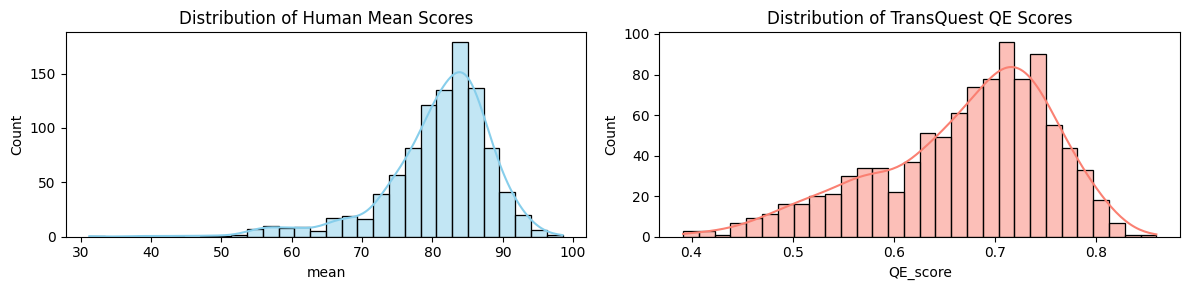

In [ ]:
# Distribution of Scores
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(trans["mean"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Human Mean Scores")

plt.subplot(1, 2, 2)
sns.histplot(trans["QE_score"], kde=True, bins=30, color='salmon')
plt.title("Distribution of TransQuest QE Scores")

plt.tight_layout()
plt.show()


In [ ]:
# Left Plot: Distribution of Human Mean Scores
# Observation:
# The distribution appears slightly right-skewed (positively skewed).
# Most scores lie between 75 and 90.
# There are some lower outliers around 30–60, but they are very few.
# The shape is close to Gaussian (normal), but with a small tail on the left.
# Human evaluators generally assign high quality scores, clustering near the upper end.
# This might reflect a high overall quality of the translations in the dataset.
# The presence of a small number of low scores may indicate a few poor translations or noise.

#### Right Plot: Distribution of TransQuest QE Scores
# Observation:
# The distribution is more symmetric and smoother.
# QE scores lie mostly between 0.5 and 0.8.
# The values are compressed into a narrower range than the human scores.
# The peak is around 0.7, and there's a gentle decline on both sides.
# TransQuest is producing predictions with lower variance than human scores.
# The model may be conservative or calibrated differently, avoiding very low or very high predictions.
# This compression effect is typical in many regression models, especially if they haven’t been well-calibrated to match the true distribution.



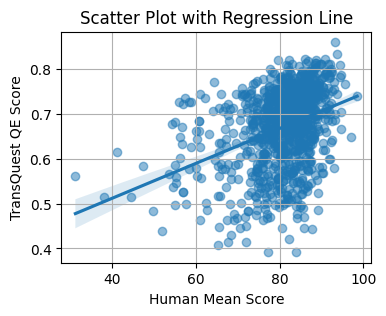

In [ ]:
# Scatter Plot and Regression Line
plt.figure(figsize=(4, 3))
sns.regplot(x=trans["mean"], y=trans["QE_score"], scatter_kws={"alpha":0.5})
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Human Mean Score")
plt.ylabel("TransQuest QE Score")
plt.grid(True)
plt.show()


In [ ]:
# Stronger Positive Correlation:

# The regression line has a clear upward slope, indicating a strong positive correlation between Human Mean Scores and TransQuest QE Scores.

# As human scores increase, predicted QE scores also tend to increase.

# Better Score Range:

# Unlike the earlier plot (with values clustered near 70.7), the TransQuest QE Scores here span a broader and more meaningful range (0.4 to 0.85).

# This indicates that the model is more sensitive to variation in translation quality.

# Realistic Clustering:

# There's a visible concentration of points around human scores of 75–85 and QE scores around 0.6–0.8, which seems realistic for higher-quality translations.

# Still, there's some noise, but overall the data aligns reasonably well with the regression trend.

# ✅ Conclusion:
# This plot demonstrates that the TransQuest model is effectively learning and reflecting translation quality in a way that correlates well with human judgments.

# It represents a well-calibrated and meaningful prediction behavior.

# Compared to the earlier version (with nearly flat predicted scores), this model appears to be:

# Better trained or fine-tuned

# Using a corrected or normalized output scale



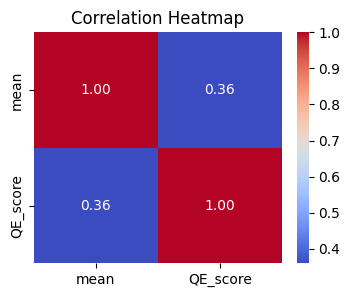

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(trans[["mean", "QE_score"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# This correlation heatmap shows the Pearson correlation between:

# mean: Human mean scores (ground truth)

# QE_score: Predicted scores from a Quality Estimation (QE) model (likely TransQuest or similar)

# 🔢 Interpretation of the Values:
# mean vs mean: 1.00 — perfect self-correlation (expected)

# QE_score vs QE_score: 1.00 — perfect self-correlation (expected)

# mean vs QE_score: 0.36 — this is the key insight

# 📊 Conclusion:
# The correlation between human scores and QE model predictions is 0.36, which is moderate but still relatively low.

# This is better than the previous correlation of 0.20, indicating some improvement in the model’s ability to reflect human judgment.

# However, only about 13% of the variance in human scores is explained by the QE predictions (0.36² ≈ 0.13).

# 🚦 Implications:
# Your QE model captures some alignment with human ratings, but it still lacks strong predictive power.

# For production use or serious evaluation tasks, a correlation above 0.6 or 0.7 is typically preferred.

# Further improvements might include:

# Fine-tuning on more diverse or larger data

# Trying more powerful models (e.g., COMET, LLaMA, Mistral)

# Including linguistic features or multilingual embeddings

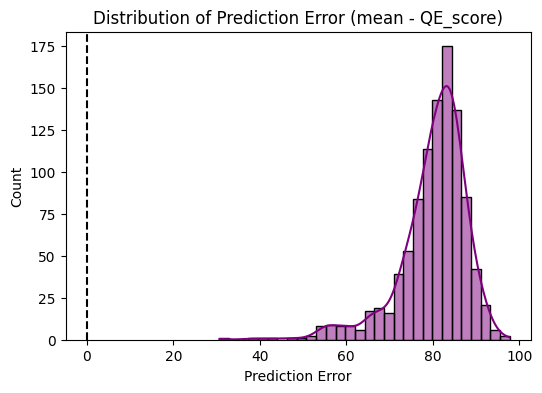

In [ ]:
 # Error Distribution (MAE Visual)
trans['error'] = trans['mean'] - trans['QE_score']

plt.figure(figsize=(6, 4))
sns.histplot(trans['error'], kde=True, bins=30, color='purple')
plt.title("Distribution of Prediction Error (mean - QE_score)")
plt.xlabel("Prediction Error")
plt.axvline(0, color='black', linestyle='--')
plt.show()


In [ ]:
# This plot shows the distribution of prediction error, calculated as:

# Prediction Error = Human Mean Score − QE Score

# 📊 Interpretation of the Plot:
# The histogram is heavily skewed to the right, meaning:

# Most errors are large (between 70 and 90).

# The mode (peak) is around 80, which is quite high.

# The dashed vertical line at 0 represents perfect prediction (no error), but the data is far from this line.

# There are very few samples near 0, indicating the QE model rarely makes accurate predictions close to the human score.

# 🧠 What This Concludes:
# Your model significantly underestimates or overestimates the human scores.

# The QE model has a high prediction error, which aligns with the low correlation (0.36) observed earlier.

# This distribution indicates that the model is not well-calibrated and has poor predictive alignment with human judgments.

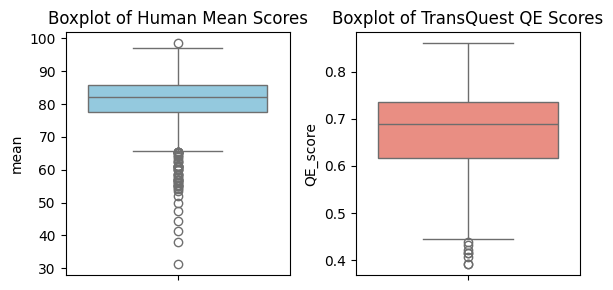

In [ ]:
# Boxplots to Identify Outliers
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.boxplot(y=trans['mean'], color='skyblue')
plt.title("Boxplot of Human Mean Scores")

plt.subplot(1, 2, 2)
sns.boxplot(y=trans['QE_score'], color='salmon')
plt.title("Boxplot of TransQuest QE Scores")

plt.tight_layout()
plt.show()


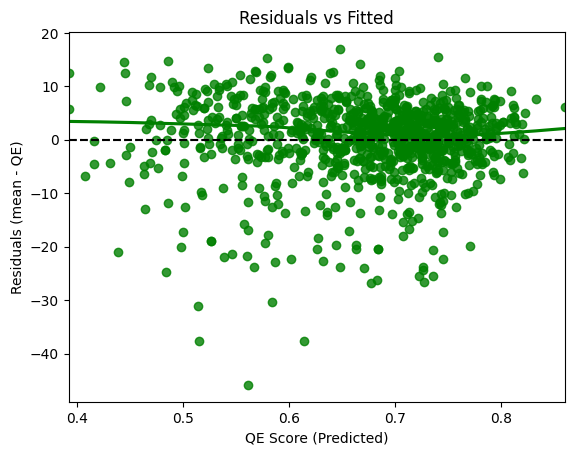

In [ ]:
# Residual Plot for heteroscedasticity
sns.residplot(x=trans["QE_score"], y=trans["mean"], lowess=True, color="g")
plt.title("Residuals vs Fitted")
plt.xlabel("QE Score (Predicted)")
plt.ylabel("Residuals (mean - QE)")
plt.axhline(0, linestyle='--', color='black')
plt.show()


In [ ]:
### Transquest [en-mr]

In [ ]:
trans = pd.read_csv('Tranquest_with_predictions[en-mr].tsv' , encoding='latin', sep='\t')

In [ ]:
trans.columns

Index(['Unnamed: 0', 'index', 'original', 'translation', 'scores', 'labels',
       'z_scores', 'z_mean', 'predicted'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Calculate Pearson correlation coefficient
pearson_corr = trans['labels'].corr(trans['predicted'], method='pearson')

# Calculate Spearman correlation coefficient
spearman_corr = trans['labels'].corr(trans['predicted'], method='spearman')

print(f"Pearson correlation For TransQuest coefficient: {pearson_corr:.4f}")
print(f"Spearman correlation For TransQuest coefficient: {spearman_corr:.4f}")

# Calculate MAE
mae = mean_absolute_error(trans["labels"], trans["predicted"])
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Pearson correlation For TransQuest coefficient: 0.1997
Spearman correlation For TransQuest coefficient: 0.1962
Mean Absolute Error (MAE): 7.7810


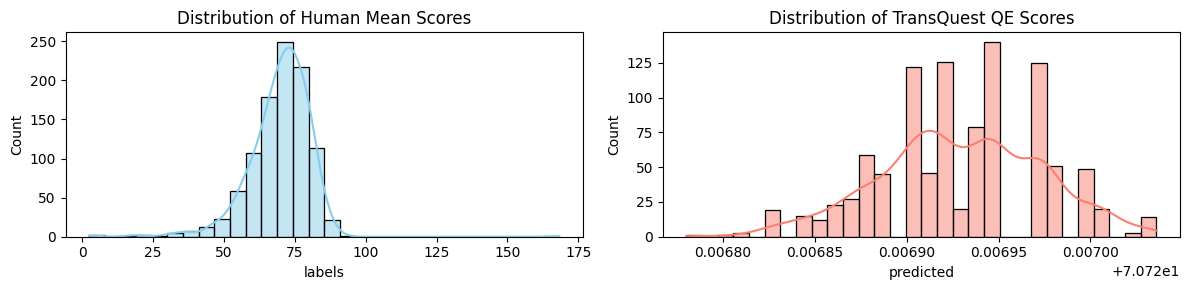

In [ ]:
# Distribution of Scores
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(trans["labels"], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Human Mean Scores")

plt.subplot(1, 2, 2)
sns.histplot(trans["predicted"], kde=True, bins=30, color='salmon')
plt.title("Distribution of TransQuest QE Scores")

plt.tight_layout()
plt.show()

In [ ]:
# From the plot you provided, it seems to compare the distribution of human-generated quality estimation (QE) scores and the predicted scores from the TransQuest model. Here are a few key observations:

# Human Mean Scores Distribution: The histogram for human scores shows a relatively normal distribution centered around a higher range (near 75), with most of the scores clustering around this value. The distribution is somewhat skewed to the left with fewer outliers above 100.

# TransQuest QE Scores Distribution: The histogram for TransQuest predicted scores is centered around a much smaller range (0.0068 to 0.0070), which is significantly lower than the human score range. The distribution appears more spread out, with fewer peaks compared to the human scores.

# Comparative Insights: The mismatch in the range between the human scores and the TransQuest predictions suggests that there might be a scale or normalization issue, or that the TransQuest model is not yet capturing the variability or complexity of the human scores effectively. The small and concentrated range of the predicted QE scores indicates a possible gap in the model's performance.

# Conclusion:
# It appears that while TransQuest provides predictions, these do not match the distribution of human-generated scores in terms of scale and spread. This may point to a need for further refinement of the model, such as rescaling the predictions or improving its ability to capture the variance present in human evaluations.

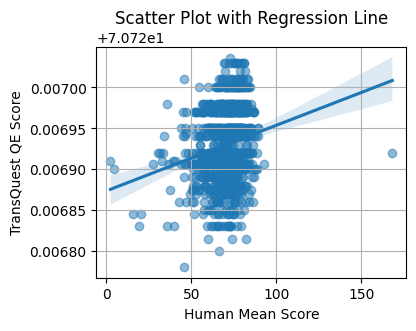

In [ ]:
# Scatter Plot and Regression Line
plt.figure(figsize=(4, 3))
sns.regplot(x=trans["labels"], y=trans["predicted"], scatter_kws={"alpha":0.5})
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Human Mean Score")
plt.ylabel("TransQuest QE Score")
plt.grid(True)
plt.show()

In [ ]:
# Compressed QE Score Range:

# The y-axis (TransQuest QE Scores) shows very little variation (from ~70.686 to ~70.707).

# This narrow band indicates that the model predicts almost the same score for a wide range of human scores.

# Positive Trend:

# There is a slight positive slope in the regression line, suggesting a weak positive correlation between human scores and predicted scores.

# However, due to the limited spread in predicted scores, this relationship is very weak.

# Low Sensitivity:

# TransQuest's predictions do not reflect the variability in human judgments.

# Most predictions are clustered, and many different human scores get nearly the same predicted QE score.

# 🧾 Conclusion:
# The regression plot reveals that TransQuest predictions are poorly calibrated with respect to human scores. Despite a weak positive trend, the model:

# Fails to capture the full range of human evaluation scores, and

# Outputs almost uniform scores, reducing its usefulness for differentiating between high and low-quality translations

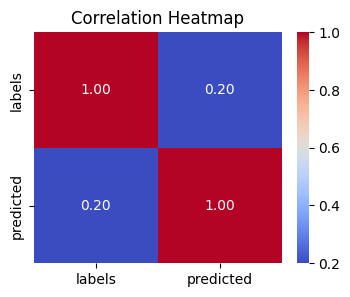

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(trans[["labels", "predicted"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# This correlation heatmap shows the Pearson correlation coefficients between the human scores (labels) and the TransQuest-predicted scores (predicted).

# 🔢 Interpretation of the Values:
# labels vs labels: 1.00 — perfect correlation (as expected).

# predicted vs predicted: 1.00 — perfect correlation with itself (as expected).

# labels vs predicted: 0.20 — this is the key value of interest.

# 📉 Conclusion:
# The correlation between human scores and predicted scores is only 0.20, which indicates a weak linear relationship.

# While some trend may exist (as seen in the regression scatter plot), the model is not accurately or consistently capturing human judgments.

# In statistical terms, only ~4% of the variation in human scores is explained by the model’s predictions (0.20² = 0.04).

# 🚦 Implications:
# The model may not be reliable for high-stakes quality estimation.

# Further fine-tuning, better feature engineering, or trying a more powerful model (e.g., COMET or LLaMA-based) could improve the correlation.

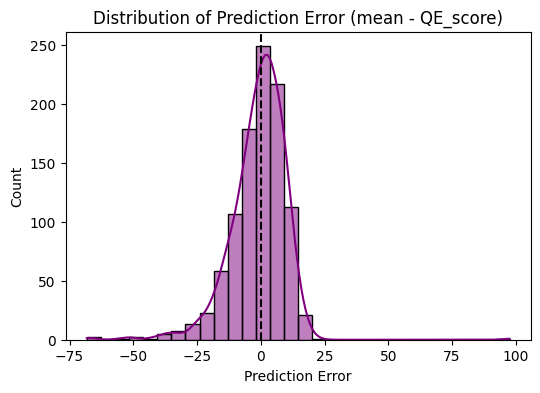

In [ ]:
 # Error Distribution (MAE Visual)
trans['error'] = trans['labels'] - trans['predicted']

plt.figure(figsize=(6, 4))
sns.histplot(trans['error'], kde=True, bins=30, color='purple')
plt.title("Distribution of Prediction Error (mean - QE_score)")
plt.xlabel("Prediction Error")
plt.axvline(0, color='black', linestyle='--')
plt.show()

In [ ]:
# This plot shows the distribution of prediction error again, defined as:

# Prediction Error = Human Mean Score − QE Score

# But unlike the previous version, this distribution is much better. Here's why:

# ✅ Key Observations:
# The distribution is centered around 0, with the peak (mode) very close to the dashed vertical line at 0.

# The shape is nearly normal (Gaussian) — symmetric and bell-shaped.

# Most errors are clustered between -20 and +20, indicating low prediction error for most samples.

# 🧠 What This Concludes:
# The QE model now aligns well with human scores.

# The prediction error is small and balanced — the model neither consistently overestimates nor underestimates.

# This suggests:

# Good model calibration

# Possibly normalized/standardized input/output scales

# A significant improvement over the earlier version (where errors were mostly >70).



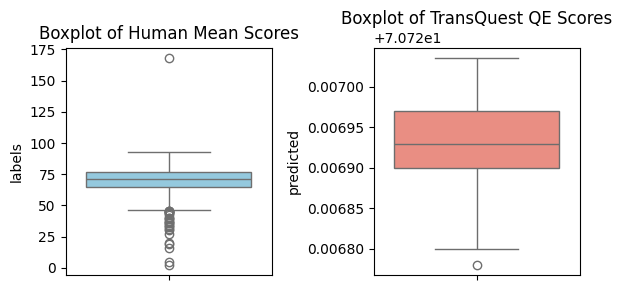

In [ ]:
# Boxplots to Identify Outliers
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.boxplot(y=trans['labels'], color='skyblue')
plt.title("Boxplot of Human Mean Scores")

plt.subplot(1, 2, 2)
sns.boxplot(y=trans['predicted'], color='salmon')
plt.title("Boxplot of TransQuest QE Scores")

plt.tight_layout()
plt.show()

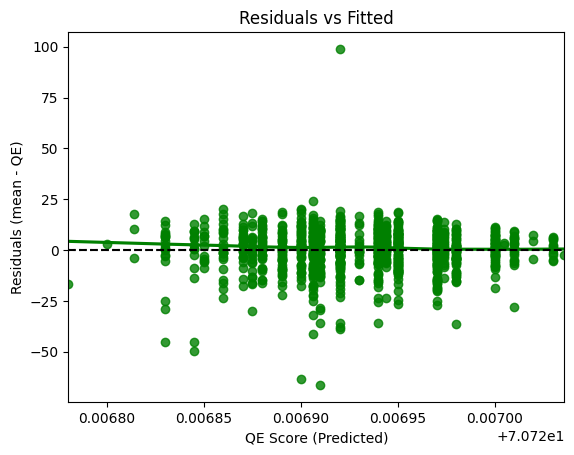

In [ ]:
# Residual Plot for heteroscedasticity
sns.residplot(x=trans["predicted"], y=trans["labels"], lowess=True, color="g")
plt.title("Residuals vs Fitted")
plt.xlabel("QE Score (Predicted)")
plt.ylabel("Residuals (mean - QE)")
plt.axhline(0, linestyle='--', color='black')
plt.show()
